<p><font size="6"><b>Xarray intro</b></font></p>


> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Introduction

In [2]:
import xarray as xr

Let's start with reading the Sentinel RGB bands for Herstappe again:

In [ ]:
herstappe_file = "./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff"
herstappe = xr.open_dataarray(herstappe_file, engine="rasterio")

In [ ]:
herstappe

In [ ]:
ax = herstappe.plot.imshow(figsize=(12, 5))
ax.axes.set_aspect('equal')

We can make the dimension information more useful by renaming the labels of the 'band' dimension:

In [ ]:
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))
herstappe

Or just rename the coordinate names itself:

In [ ]:
herstappe.rename({"x": "easting", "y": "northing"})

These __dimension coordinate names__ can be used to extract (slice) data making data selections very declarative:

In [ ]:
herstappe.sel(band='red')

The data type of this `xarray.DataArray` `herstappe` is 'float32'. Xarray uses the data types provided by NuPpy. More information on the data types NumPy supports is available in the [documentation](https://numpy.org/devdocs/user/basics.types.html#array-types-and-conversions-between-types).

Converting to another data type is supported by `astype()` method:

In [ ]:
herstappe.astype('float64')   # .nbytes

Using xarray:

- Data stored as a NumPy arrays.
- Dimensions do have a name.
- The coordinates of each of the dimensions can represent geographical coordinates, categories, dates, ... instead of just an index.

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The [`xarray` package](xarray.pydata.org/en/stable/) introduces __labels__ in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays. Xarray is inspired by and borrows heavily from Pandas.    

</div>

## Selecting data

Xarray’s labels make working with multidimensional data much easier:

In [ ]:
herstappe = xr.open_dataarray(herstappe_file, engine="rasterio")
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))

We could use the Numpy style of data slicing:

In [ ]:
herstappe[0]

However, it is often much more powerful to use xarray’s `.sel()` method to use label-based indexing, making the selection more declarative:

In [ ]:
herstappe.sel(band="red")

We can select a specific set of coordinate values as a __list__ and take the value that is most near to the given value:

In [ ]:
herstappe.sel(x=[600_000, 610_000, 620_000], method="nearest").sel(band="red").plot.line(hue="x");

Sometimes, a specific range is required. The `.sel()` method also supports __slicing__, so we can select the green band and slice a subset of the data along the x direction:

In [ ]:
herstappe.sel(x=slice(580_000, 620_000), band="green").plot.imshow(cmap="Greens")

The __positional indexing__ as you would do with the underlying Numpy array is still possible as well:

In [ ]:
herstappe[0, 100:200:10, 100:200:10]

Use a __condition__ to select data, also called fancy indexing or boolean indexing:

In [ ]:
herstappe > 0.3

However, with xarray we cannot use a mask like this to directly filter the array or assign new values. 

One typical use case for raster data is where you want to apply a mask to the data and set those values to some "NODATA" value. For plotting, this can for example be `np.nan`, and for this we can use the `where()` method:

In [ ]:
herstappe.where(herstappe > 0.3).sel(band="red").plot.imshow()

### Let's practice!

We'll again look at some Sentinel GeoTiff data, this time from the region of the City of Ghent:

<div class="alert alert-success">

**EXERCISE**:

* Read in the file `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` with xarray and assign the data to a new variable `tc_data`.  
* Check the data type of `tc_data` and compare it with the information in the file metadata using `gdalinfo` command (GDAL CLI).
* Use the `mask_and_scale` parameter in the reader function to make sure the data type of `tc_data` is the same as the raw data.     
    
<details><summary>Hints</summary>

* To run a command from the command line, add the `!` in front e.g. `!gdalinfo FILENAME`   

</details>
    
</div>

In [3]:
tc_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", engine="rasterio")
tc_data.dtype

dtype('float32')

In [4]:
!gdalinfo ./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff

Driver: GTiff/GeoTIFF
Files: ./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff
Size is 625, 317
Coordinate System is:
PROJCRS["WGS 84 / Pseudo-Mercator",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Popular Visualisation Pseudo-Mercator",
        METHOD["Popular Visualisation Pseudo Mercato

In [5]:
tc_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                            engine="rasterio", mask_and_scale=False)
tc_data.dtype

dtype('uint16')

<div class="alert alert-info" style="font-size:100%">

**Remember**: <br>

The `mask_and_scale` parameter is [by default `True`](https://docs.xarray.dev/en/stable/generated/xarray.open_dataarray.html) in xarray for the different engines. This might lead to unwanted data type conversions when the 'nodata' is not properly included in the raw data file. Make sure to check the data types.

</div>

<div class="alert alert-success">

**EXERCISE**:

* Read in the file `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` with xarray in the original raw data dtype and assign the data to a new variable `tc_data`.  
* Inspect the display of `tc_data`. What are the different dimensions of the array? 
* Select only the *second* layer of `tc_data` and assign the output to a new variable `tc_g`.
* Plot the second (green) layer.
* Create a new array with each of the elements in the `tc_g` array with a value above 15000 set to a new value of 65535.
    
<details><summary>Hints</summary>

* Use the `mask_and_scale` parameter in the reader function to make sure the data type of tc_data is the same as the raw data.
* To select a specific subset for a certain dimension of a DataArray, use the `.sel()` method. The argument name to use is the name of the dimension.
* You can mask an array and set the masked values to another value with the `.where()` method. Check the help of the method for information on the keyword arguments.    

</details>
    
</div>

In [6]:
tc_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                            engine="rasterio", mask_and_scale=False)

In [7]:
# Get the green channel
tc_g = tc_data.sel(band=2)
tc_g

<xarray.DataArray 'band_data' (y: 317, x: 625)>
[198125 values with dtype=uint16]
Coordinates:
    band         int64 2
  * x            (x) float64 3.925e+05 3.926e+05 ... 4.282e+05 4.283e+05
  * y            (y) float64 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              65535
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               band_data

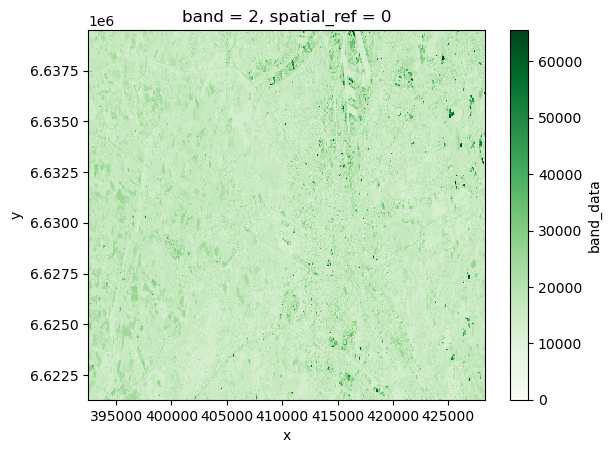

In [8]:
# Plot the green channel
tc_g.plot.imshow(cmap="Greens")

In [9]:
# Convert all values above 15000
tc_g.where(tc_g < 15000, 65535)

<xarray.DataArray 'band_data' (y: 317, x: 625)>
array([[65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 14221, 13779],
       [65535, 65535, 65535, ..., 14631, 65535, 65535],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 14516, 65535, 65535],
       [65535, 65535, 65535, ..., 13844, 65535, 65535]], dtype=uint16)
Coordinates:
    band         int64 2
  * x            (x) float64 3.925e+05 3.926e+05 ... 4.282e+05 4.283e+05
  * y            (y) float64 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              65535
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               band_data

<div class="alert alert-success">

**EXERCISE**:

Subsample the ndarray `tc_data` by taking only the one out of each 5 data points for all layers at the same time. Use _positional indexing_ to subsample the data.
    
(Be aware that this is a naive resampling implementation for educational purposes only). 
    
<details><summary>Hints</summary>

* Slicing in Numpy is similar to Python lists, but in multiple dimensions, e.g. for 2 dimensions `my_array[start:end:step-size, start:end:step-size]`.
* When selecting all elements in a given dimension, just use a single colon, e.g. `my_array[:]`. When slicing from `start` to `end` of an array, leave these values empty, e.g. `my_array[::step-size]`.
* The result should still be a 3-D array with 3 elements in the first dimension.

</details>   
    
</div>

In [10]:
tc_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                            engine="rasterio", mask_and_scale=False)

In [11]:
# subsample the data
tc_data[:, ::5, ::5].shape

(3, 64, 125)

<div class="alert alert-success">

**EXERCISE**:

Elements with the value `65535` do represent 'Not a Number' (NaN) values. However, NumPy does not support NaN values for integer data, so we'll convert to float first as data type. After reading in the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` (assign data to variable `b4_data`):
    
* Count the number of elements that are equal to `65535`
* Convert the data type to `float`, assign the result to  a new variable `b4_data_f` (numpy does not support NaN for integers).
* Assign NaN (`np.nan`) value to each of the elements of `b4_data_f` equal to `65535`
* Count the number of NaN values in the `b4_data_f` data
* Make a histogram of both the `b4_data` and `b4_data_f` data. Can you spot the difference?
    
<details><summary>Hints</summary>    

* `np.nan` represents _Not a Number (NaN)_ in Numpy. You can mask an array with np.nan values using the `where()`method
* `np.sum` will by default sum all of the elements of the input array and can also count boolean values (True = 1 and False = 0), resulting from a conditional expression. 
* To test if a value is a NaN, numpy provides `np.isnan(...)` which results in an element-wise check returning boolean values.
* Check the help of the `plt.hist` command to find out more about the `bins` and the `log` arguments.

</details>
    
   
</div>

In [12]:
b4_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                            engine="rasterio", mask_and_scale=False)

In [13]:
# Count the number of cells with value 65535
np.sum(b4_data == 65535).values

array(103)

In [15]:
# Convert to float and make 65535 equal to Nan
b4_data_f = b4_data.astype(float)
b4_data_f = b4_data_f.where(b4_data != 65535)

In [16]:
# Count the number of cells with value 0
np.sum(np.isnan(b4_data_f)).values

array(103)

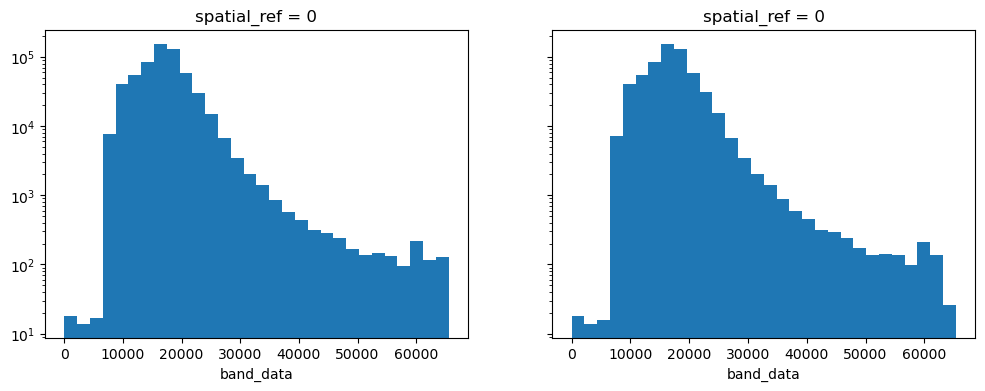

In [17]:
# Create the histogram plots
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
b4_data.plot.hist(bins=30, log=True, ax=ax0)
b4_data_f.plot.hist(bins=30, log=True, ax=ax1);

This is what the `mask_and_scale` option also does: it reads the nodata value from the metadata in the tiff file and uses this to mask the no-data value with a Nan value.

## Plotting

We already used `.plot.imshow` and `.plot.line` in the previous section and exercise. Similar to Pandas, `xarray` has a `plot` method, which can be used for different plot types.

In [18]:
xr_array = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B0408.tiff", 
                             engine="rasterio")
xr_array = xr_array.assign_coords(band=("band", ["b4", "b8"]))

It supports both 2 dimensional (e.g. line) as 3 (e.g. imshow, pcolormesh) dimensional plots. When just using `plot`, xarray will do a _best guess_ on how to plot the data. However being explicit `plot.line`, `plot.imshow`, `plot.pcolormesh`, `plot.scatter`,...  gives you more control.

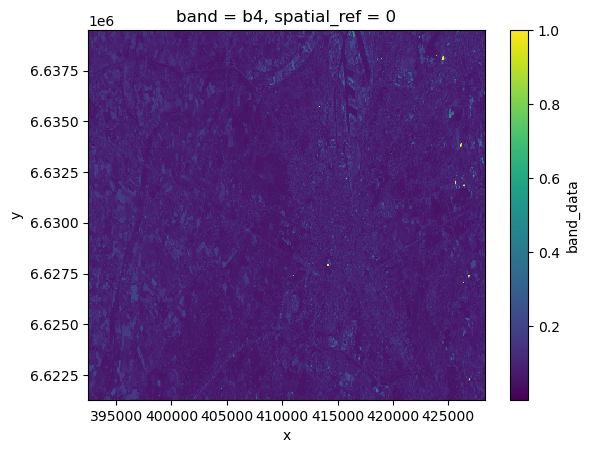

In [19]:
xr_array.sel(band="b4").plot();  # add .line() -> ValueError: For 2D inputs, please specify either hue, x or y.

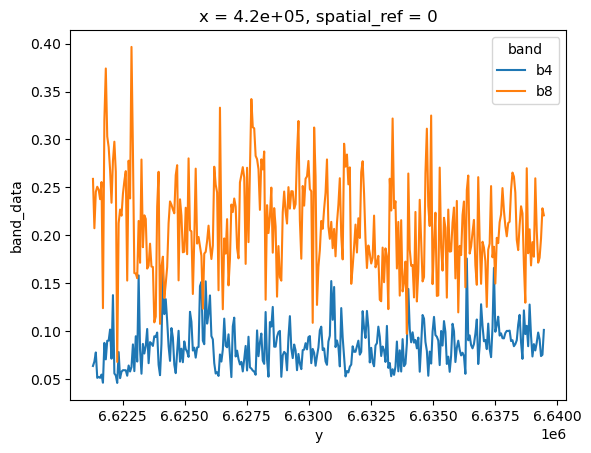

In [20]:
xr_array.sel(x=420000, method="nearest").plot.line(hue="band");

"facetting" splits the data in subplots according to a dimension, e.g. `band`

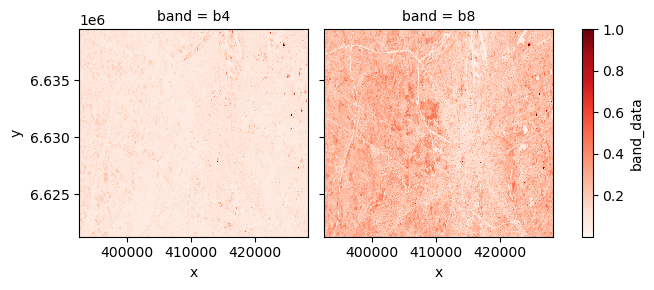

In [21]:
xr_array.plot.imshow(col="band", cmap="Reds");

Facetting also works for line plots:

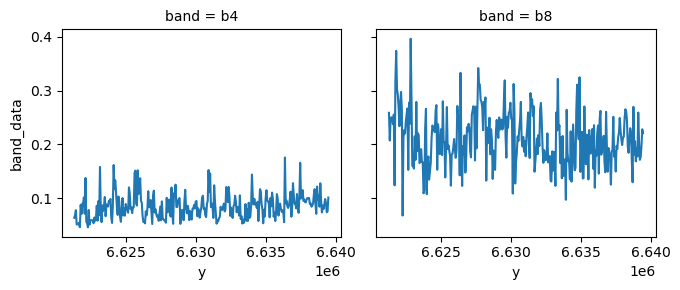

In [22]:
xr_array.sel(x=420000, method="nearest").plot.line(col="band");  # row="band"

Use the `robust` option when there is a lack of visual difference. This will use the 2nd and 98th percentiles of the data to compute the color limits. The arrows on the color bar indicate that the colors include data points outside the bounds.

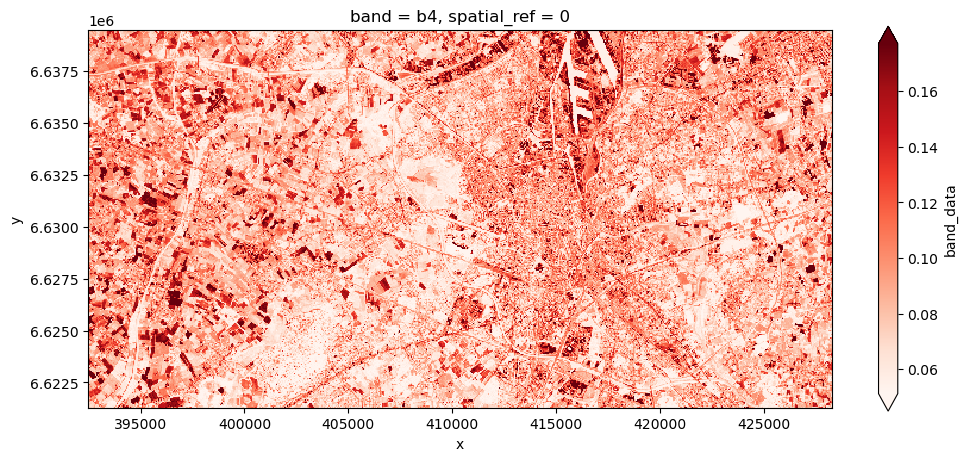

In [23]:
ax = xr_array.sel(band="b4").plot(cmap="Reds", robust=True, figsize=(12, 5))  # use False as well
ax.axes.set_aspect('equal')

In case you want to show the output with a __discrete colormap__, one can define a [set of levels to split the colormap](http://xarray.pydata.org/en/stable/user-guide/plotting.html#discrete-colormaps) on:

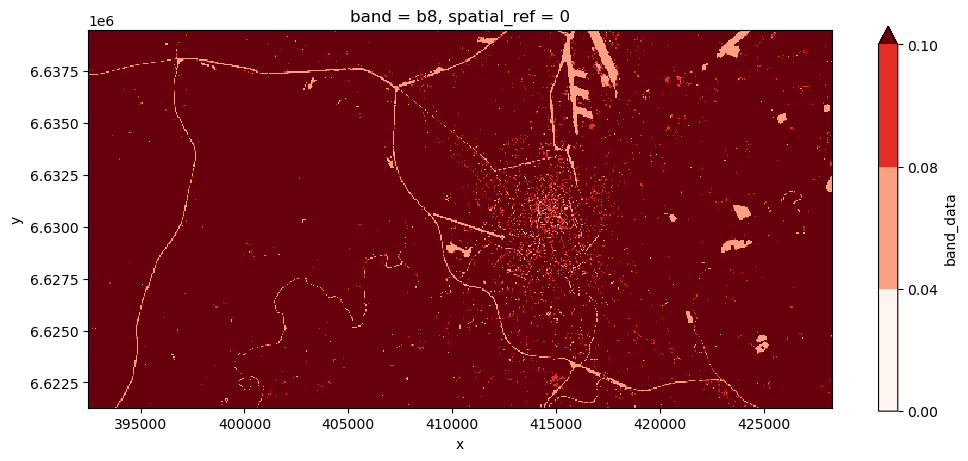

In [24]:
ax = xr_array.sel(band="b8").plot(cmap="Reds", levels=[0, 0.04, 0.08, 0.1], figsize=(12, 5))  # plot without these levels
ax.axes.set_aspect('equal')

For more control, defining the `Figure` and `Axes` Matplotlib object first provides more flexibility in terms of further adjustments. One can pass an `axes` object to an xarray `.plot` method in order to link the output:

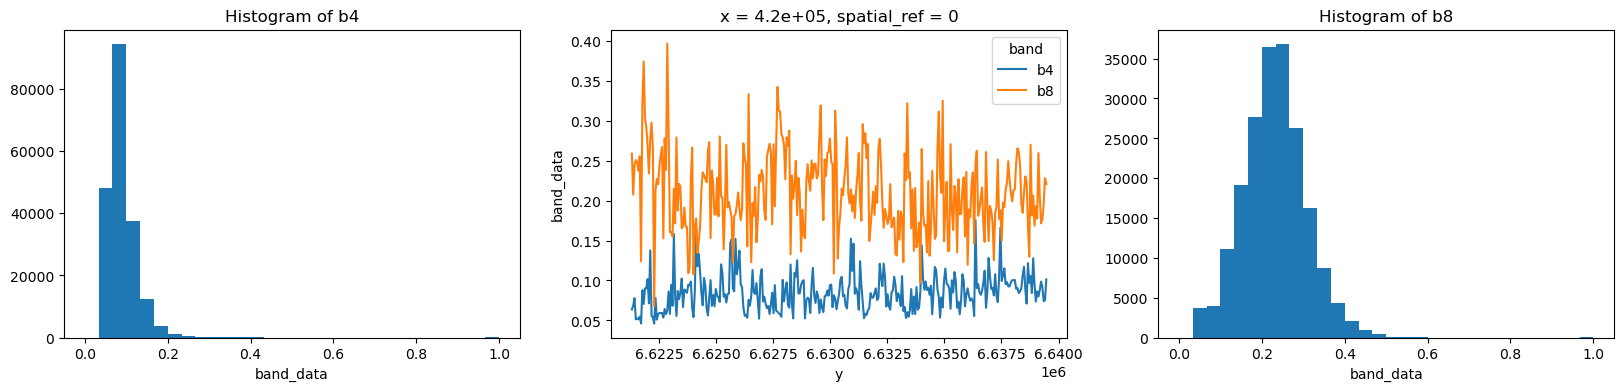

In [25]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 4))

# first subplot a histogram of band 4
xr_array.sel(band="b4").plot.hist(bins=30, ax=ax0);
ax0.set_title("Histogram of b4");

# second subplot a line plot at given x coordinate
xr_array.sel(x=420000, method="nearest").plot.line(hue="band", ax=ax1);

# third subplot a histogram of band 8
xr_array.sel(band="b8").plot.hist(bins=30, ax=ax2);
ax2.set_title("Histogram of b8");

## Reductions, element-wise calculations and broadcasting

In [ ]:
herstappe = xr.open_dataarray(herstappe_file, engine="rasterio")
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))
herstappe_red = herstappe.sel(band="red")

### Reductions

The __reductions__ (aggregations) are provided as methods and can be applied along one or more of the data dimensions.

By default, the array is reduced over all dimensions, returning a single value as a DataArray:

In [ ]:
herstappe_red.mean()

In NumPy, the dimensions are called the __axis__:

In [ ]:
herstappe_red.mean(axis=1)

But we have __dimensions with labels__, so rather than performing reductions on axes (as in NumPy), we can perform them on __dimensions__. This turns out to be convenient and declarative:

In [ ]:
herstappe_red.mean(dim="x")

Calculate the mean values for each of the bands separately:

In [ ]:
herstappe.mean(dim=["x", "y"])  # read as: 'take the mean over the dimensions x and y combined'

Or some quantiles:

In [ ]:
herstappe.quantile([0.1, 0.5, 0.9], dim=["x", "y"])

### Element-wise computations

The __for each element__ is crucial for NumPy and Xarray. The typical answer in programming would be a `for`-loop, but Numpy is optimized to do these calculations __element-wise__ (i.e. for all elements together):

In [ ]:
dummy = np.arange(1, 10)
dummy

In [ ]:
dummy*10

Instead of:

In [ ]:
[el*20 for el in dummy]

Numpy provides most of the familiar arithmetic operators to apply on an element-by-element basis:

In [ ]:
np.exp(dummy), np.sin(dummy), dummy**2, np.log(dummy)

Xarray works seamlessly with those arithmetic operators and numpy array functions.

In [ ]:
herstappe_red * 10.

In [ ]:
np.log(herstappe_red)

We can combine multiple xarray arrays in arithemetic operations:

In [ ]:
herstappe.sel(band="red") - herstappe.sel(band="green")

### Broadcasting

When we combine arrays with different shapes during arithmetic operations, NumPy and Xarray apply a set of __broadcoasting__ rules and the smaller array is _broadcast_ across the larger array so that they have compatible shapes. 

Perfoming an operation on arrays with different coordinates will result in automatic broadcasting:

In [ ]:
herstappe.x.shape, herstappe_red.shape

In [ ]:
herstappe_red + herstappe.x  # Note, this calculaton does not make much sense, but illustrates broadcasting

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The combination of element-wise calculations, efficient reductions and broadcasting provides NumPy and Xarray a lot of power. In general, it is a good advice to __avoid for loops__ when working with arrays.

</div>

### Let's practice!

<div class="alert alert-success">

**EXERCISE**:

The data set `./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` (assign to variable `herstappe_data`) has values ranging in between 0.11325, 0.8575. To improve the quality of the visualization, stretch __each of the layers individually__ to the values to the range 0. to 1. with a linear transformation: 
    
$$z_{i,scaled}=\frac{z_i-\min(z)}{\max(z)-\min(z)}$$

Make a plot of the end result and compare with a plot of the original data. 

<details><summary>Hints</summary>

* We ask to do it *"for each of the bands"*, but you don't need to do it separately for each band! Using broadcasting and element-wise operations, we can do this in one go.
* First calculate the minimum and maximum value for the bands (i.e. reducing over the other (x, y) dimensions). This should result in an 1D array of length 3.
* With those min/max arrays, you can add and subtract those from the original `herstappe_data` array to obtain the scaled data.

</details>    
    
</div>

In [ ]:
herstappe_data = xr.open_dataarray("./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                                   engine="rasterio")

In [ ]:
# Calculate the min and max for each channel
h_min = herstappe_data.min(dim=["x", "y"])
h_max = herstappe_data.max(dim=["x", "y"])

In [ ]:
# Rescale the data
herstappe_rescaled = ((herstappe_data - h_min)/(h_max - h_min))

In [ ]:
# Make a plot
herstappe_rescaled.plot.imshow(figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

The true color data set for Ghent `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` contains 3 bands. Plotting with the `imshow` function can plot 3-D (RGB) data sets, but when running `gent.plot.imshow()`, we get an error. This is because matplotlib expects data in the range of [0..1] for floats or [0..255] for integers. 
    
The data type of this specific array `gent` is 16bit unsigned integer. Detailed info on data types is out of scope of this course, but remember that using 16bit unsigned integer, it can contain `2**16` different (all positive) integer values to represent the data range (in this case 0 to 1):

```
>>> 2**16
65536
```

In this excercise, we will convert the data to floats within the data range 0 -> 1 so we can plot it as RGB values.

- Read the data file and assign to a variable `gent`.
- Try to plot it with the `imshow()` method.
- Convert the array to a float array and call it `gent_f`.
- Now divide the array by 65536 to get our data in a [0-1] range.
- Plot the result with the `imshow()` method.

<details><summary>Hints</summary>

* To convert the data type of an array, you can use the `astype()` method. In this case you might as well opt to have the `mask_and_scale=true` as this will do the float conversion already.
* Masking out part of the data based on a condition can be done with the `where()` method.

</details>    
    
</div>

In [ ]:
gent = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                         engine="rasterio", mask_and_scale=False)
gent

In [ ]:
gent.plot.imshow()

In [ ]:
# Convert to float
gent_f = gent.astype(float)

In [ ]:
# Divide by the maximum of the int16 range to get [0-1] data
gent_f = gent_f / 2**16

In [ ]:
# Make a RGB plot
gent_f.plot.imshow(figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

Next, plot a greyscale version of the data as well. Instead of using a custom function just rely on the sum of the 3 bands as a quick proxy.
    
<details><summary>Hints</summary>

* A greyscale image requires a greyscale `cmap`, check the available names in [the documentation online](https://matplotlib.org/tutorials/colors/colormaps.html)
* Xarray provides the common aggregation functions as methods to a DataArray, e.g. `my_array.sum(...)`
* To do a reduction over a given dimension, use the `dim`-ension name as parameter of the method.

</details>    
    
</div>

In [ ]:
# Make a Grey scale plot
gent_f.sum(dim="band").plot.imshow(cmap="Greys", figsize=(9, 5))

<div class="alert alert-success">

**EXERCISE**:

The data sets `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` and `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff` contain respectively the 4th and the 8th band of a sentinel satellite image. To derive the [Normalized Difference Vegetation Index) (NDVI)](https://nl.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index), the two bands need to be combined as follows:
    
$$\frac{band_8 - band_4}{band_8 + band_4} $$
    
Process the images and create a plot of the NDVI:
    
- Read both data sets and store them in resp. `b4_data` and `b8_data`. 
- Transform the data range of each of the layers to the range .0 - 1.
- Calculate the NDVI
- Make a plot of the NDVI plot the data as such using the "Greens" colormap. 

__IMPROVE THE COLORMAP__
    
Using these default plot settings, the NDVI visualisation is not very informative. Actually, whereas the range is [-1, 1], values of around 0.1 and below are not considered living plants. Consider two alternative methods to improve the colormap taking into account this information:
    
1. Normalize the data linearly into the range 0.1 to 0.8 and apply this normalization to the `imshow` while using the colormap `YlGn` (so values just above 0.1 are still yellow, whereas only higher values are green). Use the Matplotlib function `mcolors.Normalize` for the data normalization.
2. To improve the contrast between vegetation versus no-vegetation, use a diverging colormap (`RdYlGn`) in combination with a [`TwoSlopeNorm`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html) to normalize the data. Let the range vary from -0.1 till 0.8 with the center on 0.4.    

<details><summary>Hints</summary>

* For more specific adjustments to the colormap, have a check on the [Matplotlib documentation on colormap normalization](https://matplotlib.org/3.3.2/tutorials/colors/colormapnorms.html). 
* Check out the available normalization by exploring the `mcolors.` module of Matplotlib. 
* The `imshow` method can accept a `norm` parameter to normalize the data.  
* It is a two step process: 1/ define a normalization; 2/ pass the normalization to the `norm` parameter of the plot function.


</details>   
           
</div>

In [ ]:
b4_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff", 
                            engine="rasterio", mask_and_scale=False).sel(band=1)
b8_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff", 
                            engine="rasterio", mask_and_scale=False).sel(band=1)

In [ ]:
# Rescale the data to 0-1
b4_data = (b4_data - b4_data.min())/(b4_data.max() - b4_data.min())
b8_data = (b8_data - b8_data.min())/(b8_data.max() - b8_data.min())

In [ ]:
# Calculate the ndvi
ndvi = (b8_data - b4_data)/(b8_data + b4_data)

In [ ]:
# As a quick reference, plot using the `"Greens"` colormap as such:
fig, ax = plt.subplots(figsize=(14, 5))
ll = ndvi.plot.imshow(ax=ax, cmap="Greens")
ax.set_aspect("equal")

In [ ]:
# A sequential colormap `YlGn` using a Matplotlib norm to adjust colormap influence on image 
# https://matplotlib.org/stable/tutorials/colors/colormapnorms.html
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(14, 5))

div_norm = mcolors.Normalize(0.1, 0.8)
ll = ndvi.plot.imshow(ax=ax, cmap="YlGn", norm=div_norm)
ax.set_aspect("equal")

In [ ]:
# A Diverging colormap `RdYlGn` with a normalization on the color limits in two directions of the central point - 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html
fig, ax = plt.subplots(figsize=(14, 5))

div_norm = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0.4, vmax=0.8)

ll = ax.imshow(ndvi.values, cmap="RdYlGn", norm=div_norm)
fig.colorbar(ll);
ax.set_axis_off();

<div class="alert alert-success">

**(ADVANCED) EXERCISE**:
    
You want to reclassify the values of the 4th band data to a fixed set of classes:
    
* x < 0.05 need to be 0
* 0.05 < x < 0.1 need to be 1
* x > 0.1 need to be 2
       
Use the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` (assign data to variable `b4_data`):
    
* Read the data set and exclude the single-value dimension to end up with a 2D array. 
* Convert to float data type and normalize the values to the range `[0., 1.]`.

To reclassify the values, we can use the `np.digitize` function. This function return the indices of the bins to which each value in input array belongs. As such, it can be used to select and manipulate values containing to a specific bin.
    
* Apply the `np.digitize` function to `b4_data` using the `xr.apply_ufunc()` function. The first argument is the function to apply, the following arguments are the arguments that would be passed to the function (`np.digitize`). Call the result `b4_data_classified`.
* Make a image plot of the reclassified variable `b4_data_classified`.
    

<details><summary>Hints</summary>

* The `apply_ufunc` function requires as input another function (in this case `np.digitize`) and is a way to use [external functionalities within xarray](http://xarray.pydata.org/en/stable/user-guide/computation.html#wrapping-custom-computation).   
* The `np.digitize` function would have as inputs the data `b4_data` and the bins to split the data, `[0.05, 0.1]`.

</details>   
    
    
</div>

In [ ]:
b4_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff", 
                            engine="rasterio", mask_and_scale=False)

In [ ]:
# Convert to 2D float array 
b4_data = b4_data.sel(band=1).astype(float)

In [ ]:
# Rescale the data
b4_data = (b4_data - b4_data.min())/(b4_data.max() - b4_data.min())

In [ ]:
# Classify the array into 3 bins
b4_data_classified = xr.apply_ufunc(np.digitize, b4_data, [0.05, 0.1])

In [ ]:
# Create an image plot
fig, ax = plt.subplots(figsize=(12, 5))
img = b4_data_classified.plot.imshow(ax=ax, add_colorbar=False, interpolation="antialiased")
fig.colorbar(img, values=[0, 1, 2], ticks=[0, 1, 2])

<div class="alert alert-info">
    
__Note:__
    
When only interested in a discrete colormap for plotting instead of the data manipulation, xarray provides the `levels` parameter whe plotting, see http://xarray.pydata.org/en/stable/user-guide/plotting.html#discrete-colormaps.    
    
</div>